In [1]:

import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:

path_csv_H = "/kaggle/input/bike-sharing-dataset/hour.csv"
DataFrame = pd.read_csv(path_csv_H)
DataFrame["dteday"] = DataFrame["dteday"].astype(str) + " " + DataFrame["hr"].astype(str) + ":0:0"
DataFrame["dteday"] = pd.to_datetime(DataFrame["dteday"])
DataFrame.set_index('dteday', inplace=True)
DataFrame = DataFrame.drop(["instant"], axis = 1)

print(DataFrame.loc["2012-10-10 00:00:00" : "2012-10-10 23:00:00"])





                     season  yr  mnth  hr  holiday  weekday  workingday  \
dteday                                                                    
2012-10-10 00:00:00       4   1    10   0        0        3           1   
2012-10-10 01:00:00       4   1    10   1        0        3           1   
2012-10-10 02:00:00       4   1    10   2        0        3           1   
2012-10-10 03:00:00       4   1    10   3        0        3           1   
2012-10-10 04:00:00       4   1    10   4        0        3           1   
2012-10-10 05:00:00       4   1    10   5        0        3           1   
2012-10-10 06:00:00       4   1    10   6        0        3           1   
2012-10-10 07:00:00       4   1    10   7        0        3           1   
2012-10-10 08:00:00       4   1    10   8        0        3           1   
2012-10-10 09:00:00       4   1    10   9        0        3           1   
2012-10-10 10:00:00       4   1    10  10        0        3           1   
2012-10-10 11:00:00      

In [3]:
time_diffs = DataFrame.index.to_series().diff()

# 2. Guarda i risultati più frequenti
print("--- Frequenza degli intervalli ---")
print(time_diffs.value_counts())

--- Frequenza degli intervalli ---
dteday
0 days 01:00:00    17303
0 days 02:00:00       64
0 days 03:00:00        6
0 days 13:00:00        1
0 days 23:00:00        1
0 days 07:00:00        1
0 days 14:00:00        1
1 days 13:00:00        1
Name: count, dtype: int64


In [4]:
#Provo Interpolando i valori che distano massimo tre mentre gli altri li includo come Nan

Lista_Cont = ["temp" , "atemp", "hum" , "windspeed"]
Lista_categ = ["weathersit", "season", "holiday", "cnt", "casual", "registered"]

full_range = pd.date_range(start=DataFrame.index.min(), end=DataFrame.index.max(), freq='h')
DataFrame = DataFrame.reindex(full_range)

# 2. Interpolazione temporale
# method='time' è CRUCIALE: tiene conto della distanza temporale reale.
# Se mancano 2 ore o 2 giorni, lui adatta la pendenza della linea correttamente.
DataFrame[Lista_Cont] = DataFrame[Lista_Cont].interpolate(method='time',limit=2, limit_direction='both')

DataFrame[Lista_categ] = DataFrame[Lista_categ].interpolate(method='nearest', limit=2, limit_direction='both')





In [5]:
# 1. Crea un filtro per le righe che hanno almeno un NaN
righe_con_null = DataFrame[DataFrame.isnull().any(axis=1)]

print("--- Righe con valori mancanti ---")
print(righe_con_null)

--- Righe con valori mancanti ---
                     season  yr  mnth  hr  holiday  weekday  workingday  \
2011-01-02 05:00:00     1.0 NaN   NaN NaN      0.0      NaN         NaN   
2011-01-03 02:00:00     1.0 NaN   NaN NaN      0.0      NaN         NaN   
2011-01-03 03:00:00     1.0 NaN   NaN NaN      0.0      NaN         NaN   
2011-01-04 03:00:00     1.0 NaN   NaN NaN      0.0      NaN         NaN   
2011-01-05 03:00:00     1.0 NaN   NaN NaN      0.0      NaN         NaN   
...                     ...  ..   ...  ..      ...      ...         ...   
2012-10-30 12:00:00     4.0 NaN   NaN NaN      0.0      NaN         NaN   
2012-11-08 03:00:00     4.0 NaN   NaN NaN      0.0      NaN         NaN   
2012-11-29 03:00:00     4.0 NaN   NaN NaN      0.0      NaN         NaN   
2012-12-24 04:00:00     1.0 NaN   NaN NaN      0.0      NaN         NaN   
2012-12-25 03:00:00     1.0 NaN   NaN NaN      1.0      NaN         NaN   

                     weathersit      temp     atemp       hum  wi

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [6]:
#Ora dall'index ricavo tutti i valori da sostituire per data ora ecc


DataFrame["yr"] = DataFrame.index.year
DataFrame["mnth"] = DataFrame.index.month
DataFrame["hr"] = DataFrame.index.hour
DataFrame["weekday"] = DataFrame.index.dayofweek

DataFrame["workingday"] = (
    (~DataFrame.index.dayofweek.isin([5, 6])) & 
    (DataFrame["holiday"] != 1)
).astype(int)


In [7]:
print(DataFrame.loc[righe_con_null.index])

                     season    yr  mnth  hr  holiday  weekday  workingday  \
2011-01-02 05:00:00     1.0  2011     1   5      0.0        6           0   
2011-01-03 02:00:00     1.0  2011     1   2      0.0        0           1   
2011-01-03 03:00:00     1.0  2011     1   3      0.0        0           1   
2011-01-04 03:00:00     1.0  2011     1   3      0.0        1           1   
2011-01-05 03:00:00     1.0  2011     1   3      0.0        2           1   
...                     ...   ...   ...  ..      ...      ...         ...   
2012-10-30 12:00:00     4.0  2012    10  12      0.0        1           1   
2012-11-08 03:00:00     4.0  2012    11   3      0.0        3           1   
2012-11-29 03:00:00     4.0  2012    11   3      0.0        3           1   
2012-12-24 04:00:00     1.0  2012    12   4      0.0        0           1   
2012-12-25 03:00:00     1.0  2012    12   3      1.0        1           0   

                     weathersit      temp     atemp       hum  windspeed  \

In [8]:
DataFrame.info()


Nan_val = DataFrame.isnull().sum().sum()

if Nan_val > 0: 
    print("Sono presenti ", Nan_val, " valori nulli")
else:
    print("Non sono presenti valori nulli")

Duplicati = DataFrame.duplicated().sum()

if Duplicati > 0: 
    print("Sono presenti ", Duplicati, " duplicati")
else:
    print("Non sono presenti Duplicati")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Freq: h
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17475 non-null  float64
 1   yr          17544 non-null  int32  
 2   mnth        17544 non-null  int32  
 3   hr          17544 non-null  int32  
 4   holiday     17475 non-null  float64
 5   weekday     17544 non-null  int32  
 6   workingday  17544 non-null  int64  
 7   weathersit  17475 non-null  float64
 8   temp        17475 non-null  float64
 9   atemp       17475 non-null  float64
 10  hum         17475 non-null  float64
 11  windspeed   17475 non-null  float64
 12  casual      17475 non-null  float64
 13  registered  17475 non-null  float64
 14  cnt         17475 non-null  float64
dtypes: float64(10), int32(4), int64(1)
memory usage: 2.4 MB
Sono presenti  690  valori nulli
Sono presenti  2  duplicati


In [9]:
#Decido di creare un dataset senza nan per le operazioni che non supportano nan 

DataFrameNN = DataFrame.dropna()

In [10]:
DataFrameNN.info()

Nan_val = DataFrameNN.isnull().sum().sum()

if Nan_val > 0: 
    print("Sono presenti ", Nan_val, " valori nulli")
else:
    print("Non sono presenti valori nulli")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17475 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17475 non-null  float64
 1   yr          17475 non-null  int32  
 2   mnth        17475 non-null  int32  
 3   hr          17475 non-null  int32  
 4   holiday     17475 non-null  float64
 5   weekday     17475 non-null  int32  
 6   workingday  17475 non-null  int64  
 7   weathersit  17475 non-null  float64
 8   temp        17475 non-null  float64
 9   atemp       17475 non-null  float64
 10  hum         17475 non-null  float64
 11  windspeed   17475 non-null  float64
 12  casual      17475 non-null  float64
 13  registered  17475 non-null  float64
 14  cnt         17475 non-null  float64
dtypes: float64(10), int32(4), int64(1)
memory usage: 1.9 MB
Non sono presenti valori nulli


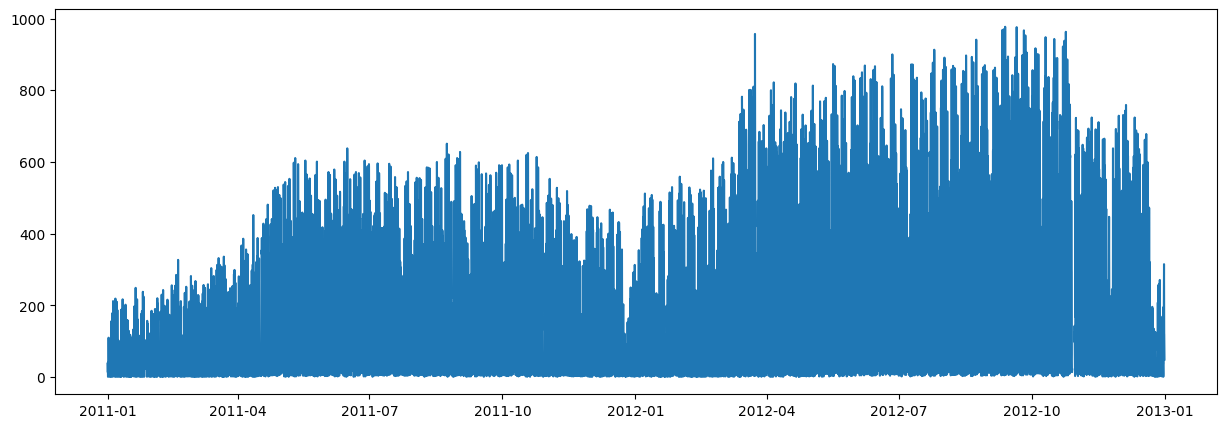

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(DataFrame["cnt"])

plt.show()

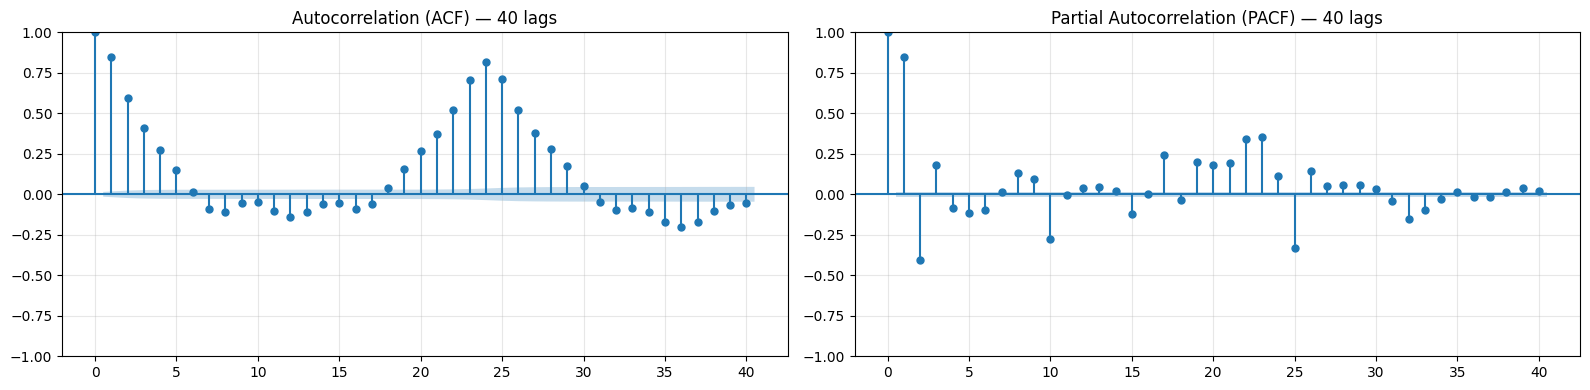

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF_LAGS = 40
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(DataFrameNN["cnt"], lags=ACF_LAGS, ax=axes[0])
axes[0].set_title(f"Autocorrelation (ACF) — {ACF_LAGS} lags")
plot_pacf(DataFrameNN["cnt"], lags=ACF_LAGS, ax=axes[1])
axes[1].set_title(f"Partial Autocorrelation (PACF) — {ACF_LAGS} lags")

for ax in axes: ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Matrice di correlazione


--- Matrice Numerica ---
              season            yr          mnth            hr   holiday  \
season      1.000000 -6.265101e-03  8.305552e-01 -5.942073e-04 -0.012274   
yr         -0.006265  1.000000e+00 -1.792434e-03 -7.523720e-15  0.006525   
mnth        0.830555 -1.792434e-03  1.000000e+00  6.212197e-16  0.017111   
hr         -0.000594 -7.523720e-15  6.212197e-16  1.000000e+00 -0.002371   
holiday    -0.012274  6.525187e-03  1.711085e-02 -2.370959e-03  1.000000   
weekday    -0.005966 -1.367527e-03  3.159300e-03 -4.351446e-18 -0.189806   
workingday  0.013328 -1.521247e-03 -5.186296e-03  7.791533e-04 -0.254005   
weathersit -0.015919 -2.108829e-02  3.128884e-03 -2.296215e-02 -0.013918   
temp        0.317300  4.510375e-02  2.076967e-01  1.434963e-01 -0.029565   
atemp       0.324670  4.361673e-02  2.141785e-01  1.397574e-01 -0.033570   
hum         0.148532 -8.440258e-02  1.620953e-01 -2.765095e-01 -0.009719   
windspeed  -0.148447 -9.856422e-03 -1.345507e-01  1.360245e-01 

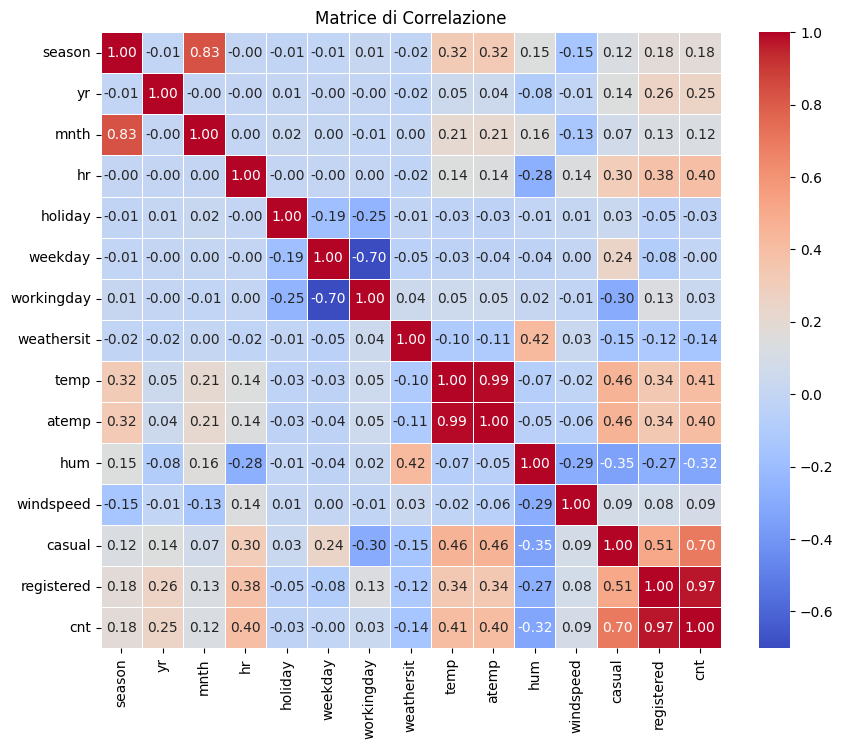

In [13]:
correlation_matrix = DataFrame.corr()

print("--- Matrice Numerica ---")
print(correlation_matrix)

# 3. Visualizzazione con Heatmap (Seaborn)
plt.figure(figsize=(10, 8))

# Creazione della heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,    # Scrive i valori nelle celle
    cmap='coolwarm', # Scala di colori (Rosso=Positiva, Blu=Negativa)
    fmt=".2f",     # Formato a 2 decimali
    linewidths=0.5 # Linee tra le celle
)

plt.title('Matrice di Correlazione')
plt.show()

# Outlier

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_g

Detected 509 outliers.
Outlier dates saved in list `outlier_dates`.
[Timestamp('2011-08-23 14:00:00'), Timestamp('2012-03-12 17:00:00'), Timestamp('2012-03-12 18:00:00'), Timestamp('2012-03-13 17:00:00'), Timestamp('2012-03-13 18:00:00'), Timestamp('2012-03-14 08:00:00'), Timestamp('2012-03-14 17:00:00'), Timestamp('2012-03-14 18:00:00'), Timestamp('2012-03-15 17:00:00'), Timestamp('2012-03-15 18:00:00'), Timestamp('2012-03-17 12:00:00'), Timestamp('2012-03-17 13:00:00'), Timestamp('2012-03-17 14:00:00'), Timestamp('2012-03-17 15:00:00'), Timestamp('2012-03-17 16:00:00'), Timestamp('2012-03-17 17:00:00'), Timestamp('2012-03-19 17:00:00'), Timestamp('2012-03-19 18:00:00'), Timestamp('2012-03-20 17:00:00'), Timestamp('2012-03-20 18:00:00'), Timestamp('2012-03-21 17:00:00'), Timestamp('2012-03-21 18:00:00'), Timestamp('2012-03-22 08:00:00'), Timestamp('2012-03-22 17:00:00'), Timestamp('2012-03-22 18:00:00'), Timestamp('2012-03-23 08:00:00'), Timestamp('2012-03-23 17:00:00'), Timestamp('20

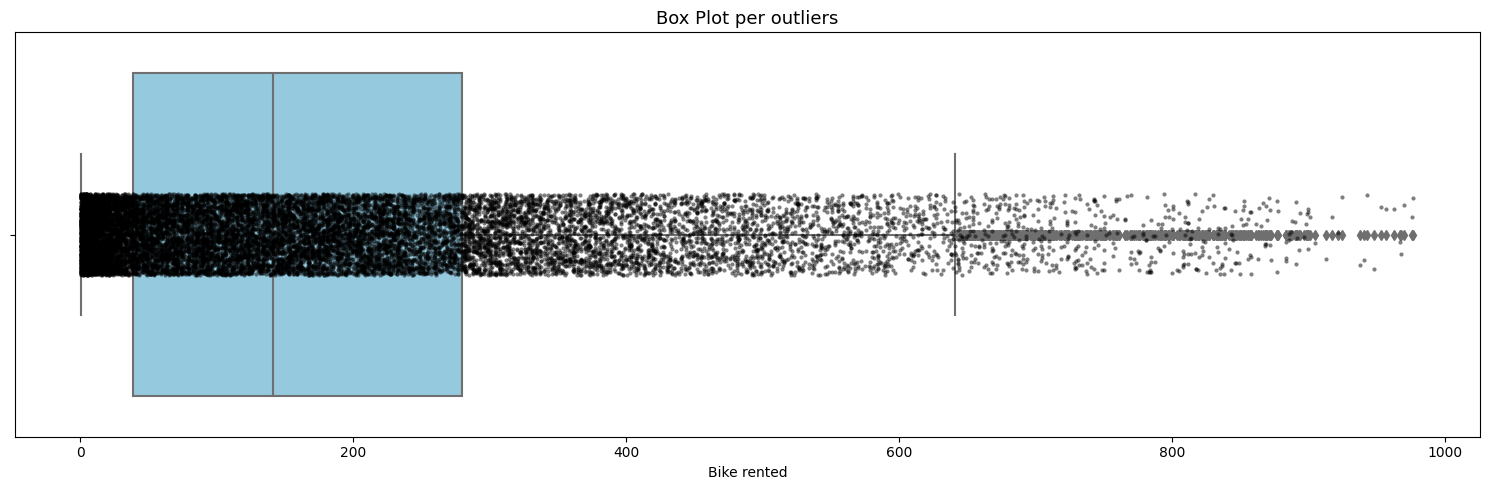

In [14]:
# Detect outliers

Q1, Q3 = DataFrame["cnt"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
outliers = DataFrame["cnt"][(DataFrame["cnt"] < lower_bound) | (DataFrame["cnt"] > upper_bound)]

# Save outlier dates for later use
outlier_dates = list(outliers.index)
print(f"Detected {len(outliers)} outliers.")
print("Outlier dates saved in list `outlier_dates`.")
print(outlier_dates)


plt.figure(figsize=(15, 5))
sns.boxplot(x = DataFrame["cnt"], color='skyblue', fliersize=5)
sns.stripplot(x = DataFrame["cnt"], color='black', size=3, jitter=True, alpha=0.5)
plt.title("Box Plot per outliers", fontsize=13)
plt.xlabel("Bike rented")
plt.tight_layout()
plt.show()

# Analisi esplorativa 


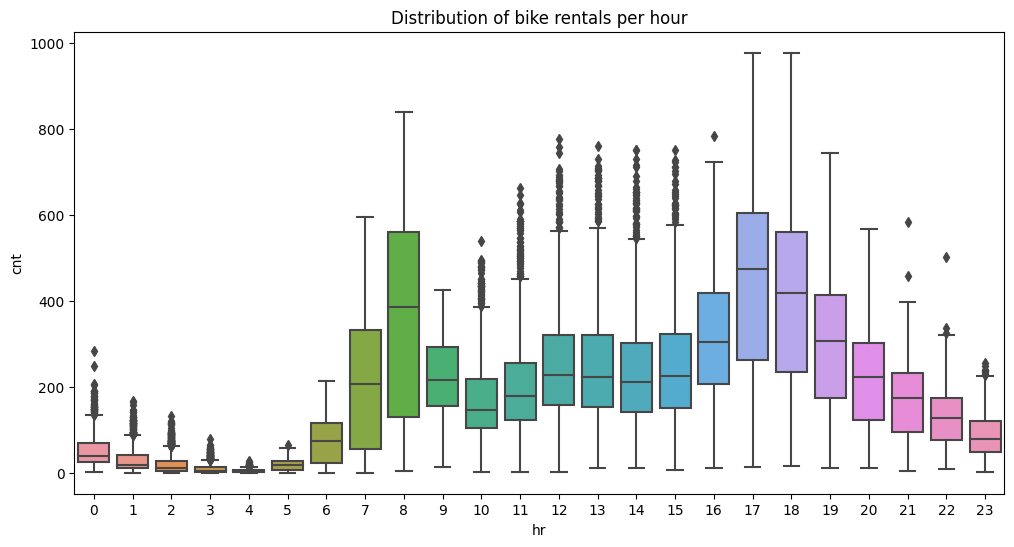

In [15]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=DataFrame)
plt.title('Distribution of bike rentals per hour')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

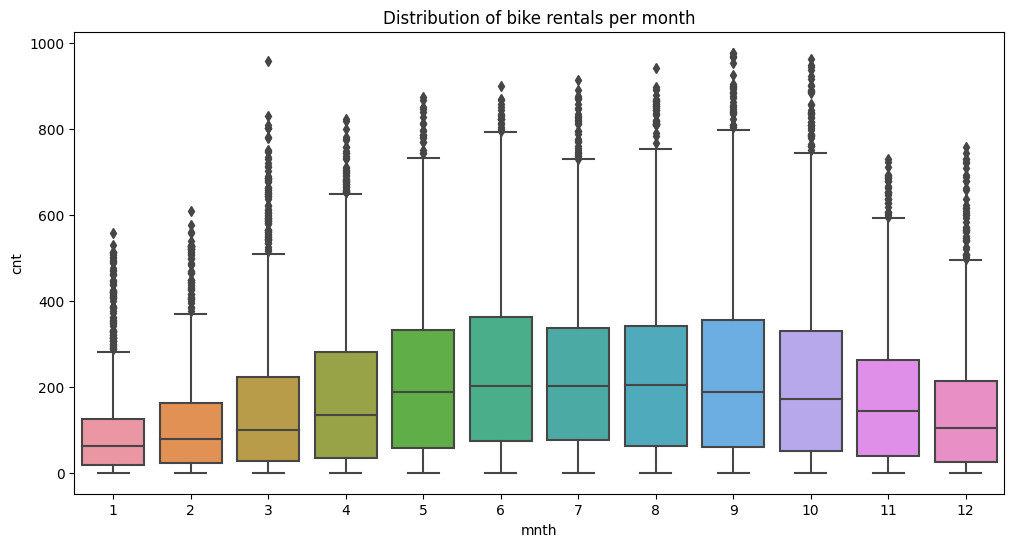

In [16]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='mnth', y='cnt', data=DataFrame)
plt.title('Distribution of bike rentals per month')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

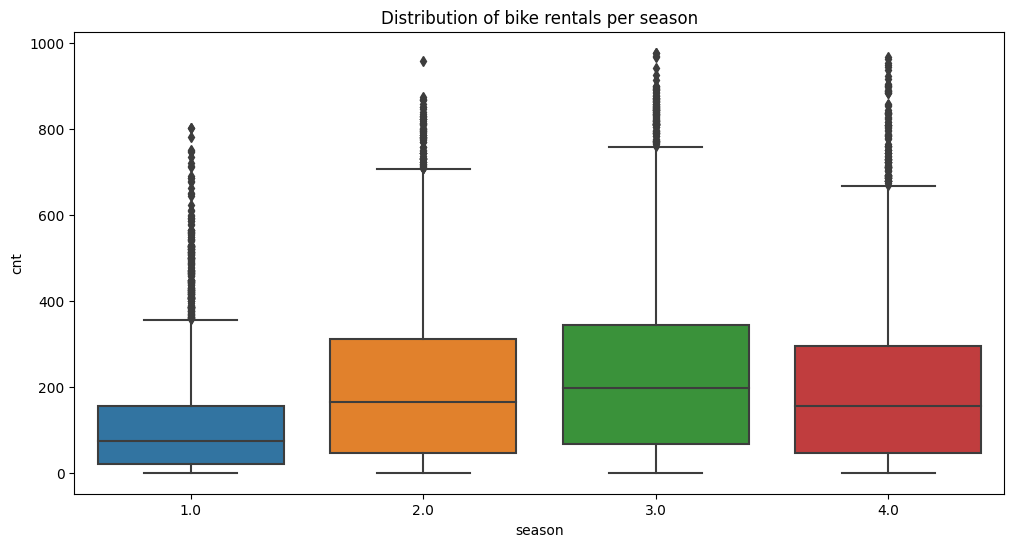

In [17]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='season', y='cnt', data=DataFrame)
plt.title('Distribution of bike rentals per season')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

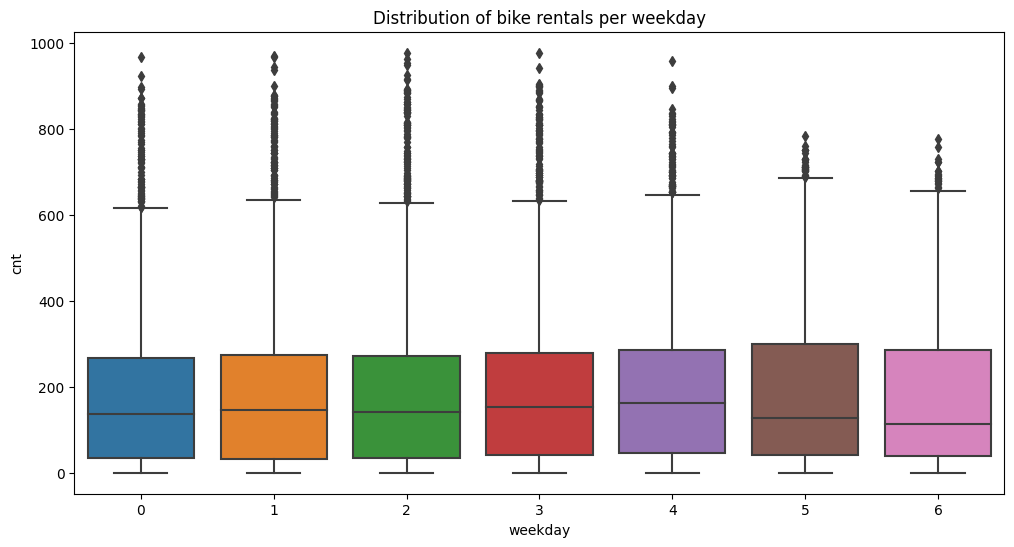

In [18]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='weekday', y='cnt', data=DataFrame)
plt.title('Distribution of bike rentals per weekday')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


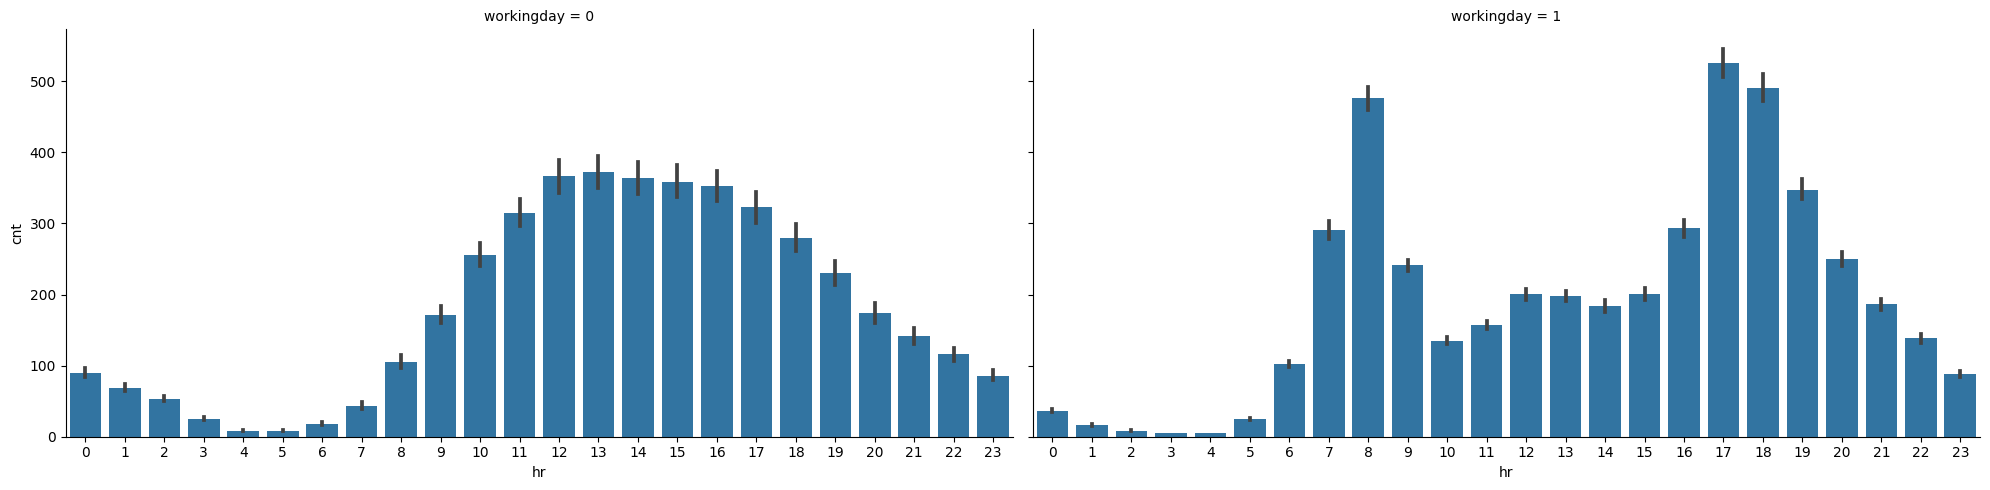

In [19]:

d = sns.FacetGrid(DataFrame, col="workingday", height=5, aspect=2)
d.map(sns.barplot, "hr", "cnt")

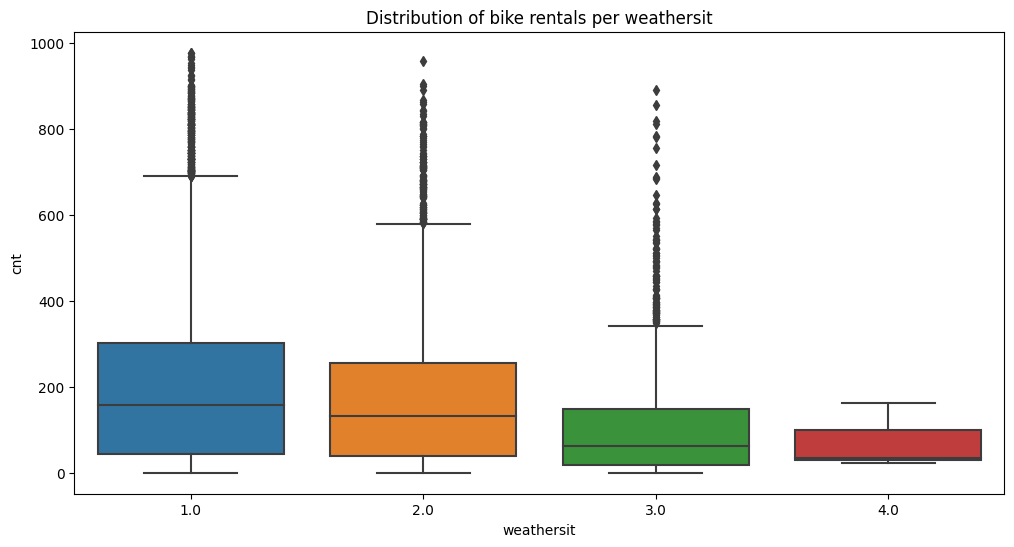

In [20]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='weathersit', y='cnt', data=DataFrame)
plt.title('Distribution of bike rentals per weathersit')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

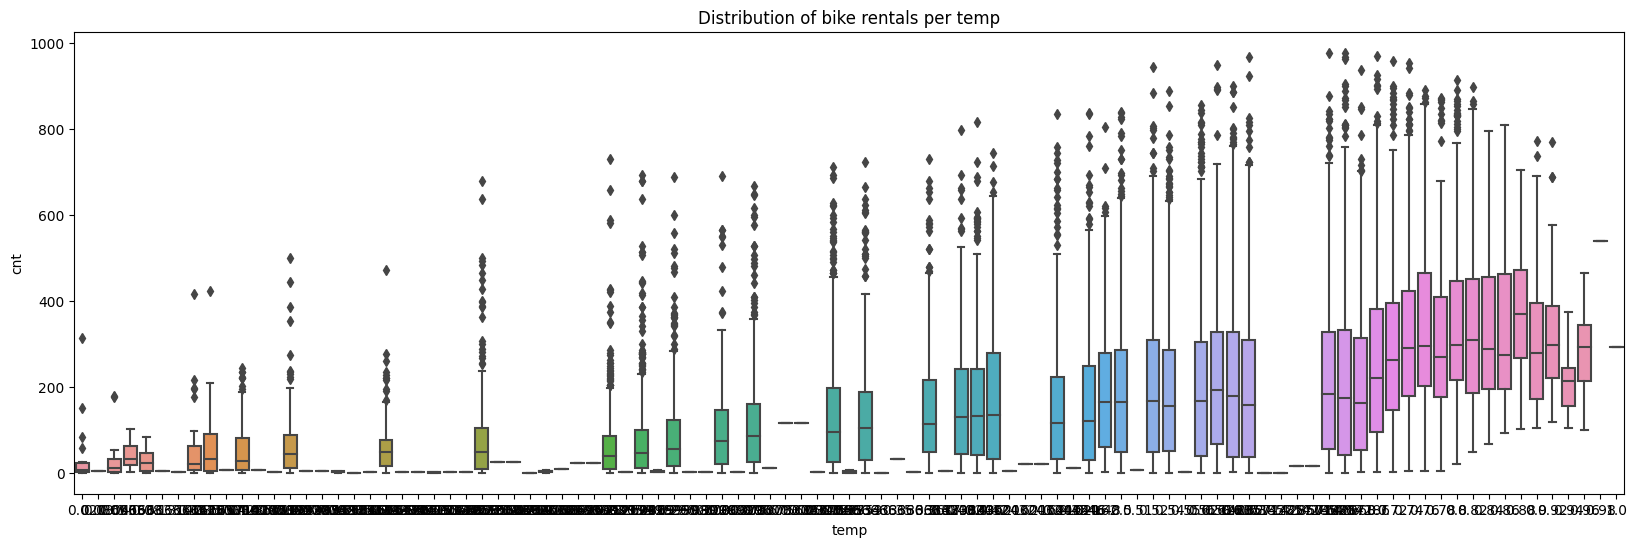

In [21]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='temp', y='cnt', data=DataFrame)
plt.title('Distribution of bike rentals per temp')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

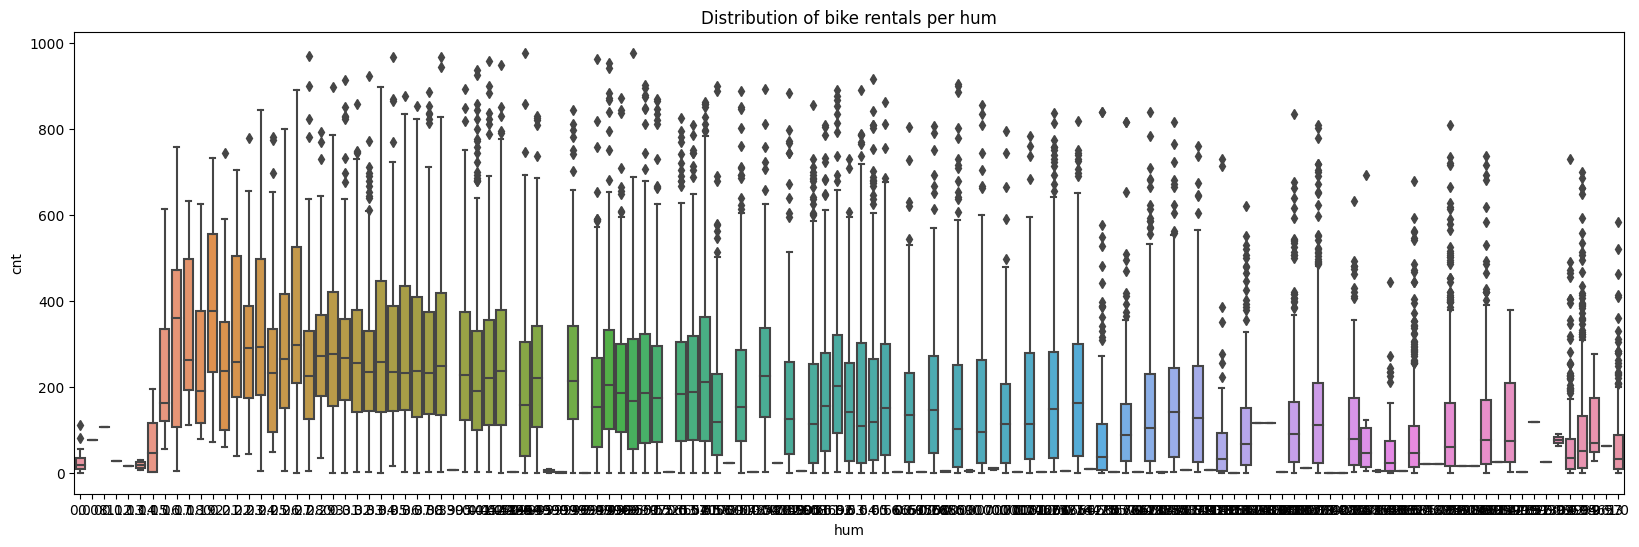

In [22]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='hum', y='cnt', data=DataFrame)
plt.title('Distribution of bike rentals per hum')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [23]:
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return 1
    else:
        return 0

# Apply the function to the 'hr' column to create the new 'rush_hour' feature
DataFrameNN['Orario_punta'] = DataFrameNN['hr'].apply(is_rush_hour)

print(DataFrameNN)

                     season    yr  mnth  hr  holiday  weekday  workingday  \
2011-01-01 00:00:00     1.0  2011     1   0      0.0        5           0   
2011-01-01 01:00:00     1.0  2011     1   1      0.0        5           0   
2011-01-01 02:00:00     1.0  2011     1   2      0.0        5           0   
2011-01-01 03:00:00     1.0  2011     1   3      0.0        5           0   
2011-01-01 04:00:00     1.0  2011     1   4      0.0        5           0   
...                     ...   ...   ...  ..      ...      ...         ...   
2012-12-31 19:00:00     1.0  2012    12  19      0.0        0           1   
2012-12-31 20:00:00     1.0  2012    12  20      0.0        0           1   
2012-12-31 21:00:00     1.0  2012    12  21      0.0        0           1   
2012-12-31 22:00:00     1.0  2012    12  22      0.0        0           1   
2012-12-31 23:00:00     1.0  2012    12  23      0.0        0           1   

                     weathersit  temp   atemp   hum  windspeed  casual  \
2

/tmp/ipykernel_87/4117219270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameNN['Orario_punta'] = DataFrameNN['hr'].apply(is_rush_hour)


# Creiamo delle variabili Dummy

In [24]:

Dummies = ["mnth", "weekday", "weathersit"]

for i in Dummies:
    DataFrameNN = pd.get_dummies(DataFrameNN, columns=[i], dtype=int)


print(DataFrameNN)


                     season    yr  hr  holiday  workingday  temp   atemp  \
2011-01-01 00:00:00     1.0  2011   0      0.0           0  0.24  0.2879   
2011-01-01 01:00:00     1.0  2011   1      0.0           0  0.22  0.2727   
2011-01-01 02:00:00     1.0  2011   2      0.0           0  0.22  0.2727   
2011-01-01 03:00:00     1.0  2011   3      0.0           0  0.24  0.2879   
2011-01-01 04:00:00     1.0  2011   4      0.0           0  0.24  0.2879   
...                     ...   ...  ..      ...         ...   ...     ...   
2012-12-31 19:00:00     1.0  2012  19      0.0           1  0.26  0.2576   
2012-12-31 20:00:00     1.0  2012  20      0.0           1  0.26  0.2576   
2012-12-31 21:00:00     1.0  2012  21      0.0           1  0.26  0.2576   
2012-12-31 22:00:00     1.0  2012  22      0.0           1  0.26  0.2727   
2012-12-31 23:00:00     1.0  2012  23      0.0           1  0.26  0.2727   

                      hum  windspeed  casual  ...  weekday_1  weekday_2  \
2011-01-01 0

In [25]:
"""
#Stazionarizzo la mia distribuzione 

# Fa tutto quello che faceva il tuo ciclo for, ma giusto e veloce
DataFrameNN["cnt"] = np.log1p(DataFrameNN["cnt"])
DataFrameNN["cnt"] = DataFrameNN["cnt"].diff()
DataFrame.dropna(inplace=True)
plt.figure(figsize=(15, 5))
plt.plot(DataFrameNN["cnt"])

plt.show()

"""

'\n#Stazionarizzo la mia distribuzione \n\n# Fa tutto quello che faceva il tuo ciclo for, ma giusto e veloce\nDataFrameNN["cnt"] = np.log1p(DataFrameNN["cnt"])\nDataFrameNN["cnt"] = DataFrameNN["cnt"].diff()\nDataFrame.dropna(inplace=True)\nplt.figure(figsize=(15, 5))\nplt.plot(DataFrameNN["cnt"])\n\nplt.show()\n\n'

In [26]:
def add_lag_features(df, target_col, memory, drop_nan=True):
    """
    Aggiunge colonne di lag a un DataFrame.
    
    Parametri:
    - df: Il DataFrame originale.
    - target_col: Il nome della colonna da 'laggare' (es. 'cnt').
    - memory: Quanti passi indietro vuoi andare (es. 7).
    - drop_nan: Se True, rimuove le prime righe che contengono NaN.
    
    Ritorna:
    - Un nuovo DataFrame con le colonne aggiunte.
    """
    
    # 1. Creiamo una copia per non sporcare il DF originale fuori dalla funzione
    df_out = df.copy()
    
    # 2. Dizionario per raccogliere i nuovi lag (più veloce di aggiungere colonna per colonna)
    lags_dict = {}
    
    for i in range(1, memory + 1):
        # Nome della nuova colonna, es: cnt_lag_1, cnt_lag_2
        col_name = f"{target_col}_lag_{i}"
        # .shift(i) sposta i dati in basso di i posizioni
        lags_dict[col_name] = df_out[target_col].shift(i)
        
    # 3. Concatenazione finale
    # Creiamo un DF temporaneo dai lag e lo uniamo all'originale
    df_lags = pd.DataFrame(lags_dict, index=df_out.index)
    df_out = pd.concat([df_out, df_lags], axis=1)
    
    # 4. Pulizia (Opzionale ma consigliata)
    if drop_nan:
        df_out.dropna(inplace=True)
        print(f"Rimossi i primi {memory} valori NaN creati dai lag.")
        
    return df_out

Temp_Data = add_lag_features(DataFrameNN, "cnt", 24)
Temp_Data = Temp_Data.drop(['season', 'yr', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'Orario_punta', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1.0',
       'weathersit_2.0', 'weathersit_3.0', 'weathersit_4.0'], axis = 1)
DataFrameNN = DataFrameNN.drop(["cnt"], axis = 1)

Dataset_Tot =  DataFrameNN.join([Temp_Data])
Dataset_Tot.dropna(inplace = True)
print(Dataset_Tot)


Rimossi i primi 24 valori NaN creati dai lag.
                     season    yr  hr  holiday  workingday  temp   atemp  \
2011-01-02 00:00:00     1.0  2011   0      0.0           0  0.46  0.4545   
2011-01-02 01:00:00     1.0  2011   1      0.0           0  0.44  0.4394   
2011-01-02 02:00:00     1.0  2011   2      0.0           0  0.42  0.4242   
2011-01-02 03:00:00     1.0  2011   3      0.0           0  0.46  0.4545   
2011-01-02 04:00:00     1.0  2011   4      0.0           0  0.46  0.4545   
...                     ...   ...  ..      ...         ...   ...     ...   
2012-12-31 19:00:00     1.0  2012  19      0.0           1  0.26  0.2576   
2012-12-31 20:00:00     1.0  2012  20      0.0           1  0.26  0.2576   
2012-12-31 21:00:00     1.0  2012  21      0.0           1  0.26  0.2576   
2012-12-31 22:00:00     1.0  2012  22      0.0           1  0.26  0.2727   
2012-12-31 23:00:00     1.0  2012  23      0.0           1  0.26  0.2727   

                      hum  windspeed  cas

In [27]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
 
standardize = ['cnt_lag_1', 'cnt_lag_2', 'cnt_lag_3', 'cnt_lag_4', 'cnt_lag_5', 'cnt_lag_6', 'cnt_lag_7', 'cnt_lag_8', 'cnt_lag_9', 'cnt_lag_10', 'cnt_lag_11', 'cnt_lag_12', 'cnt_lag_13', 'cnt_lag_14', 'cnt_lag_15', 'cnt_lag_16', 'cnt_lag_17', 'cnt_lag_18', 'cnt_lag_19', 'cnt_lag_20', 'cnt_lag_21', 'cnt_lag_22', 'cnt_lag_23', 'cnt_lag_24']

x_data = Dataset_Tot.drop(['cnt', 'casual' , "registered"], axis=1)
y_data = Dataset_Tot['cnt']


x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle = False)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)




shape of x_train (13960, 57)
shape of y_train (13960,)
shape of x_test (3491, 57)
shape of y_test (3491,)


In [28]:
lm = LinearRegression() 

lm.fit(x_train,y_train)

y_pred= lm.predict(x_test)

print(y_pred[:5])

[ 43.09320295 127.6737109  383.11551321 562.71858207 506.31765007]


                     Reale    Predetto
2012-08-07 05:00:00   36.0   43.093203
2012-08-07 06:00:00  179.0  127.673711
2012-08-07 07:00:00  502.0  383.115513
2012-08-07 08:00:00  705.0  562.718582
2012-08-07 09:00:00  327.0  506.317650
...                    ...         ...
2012-12-31 19:00:00  119.0  106.666917
2012-12-31 20:00:00   89.0   93.568177
2012-12-31 21:00:00   90.0   92.012124
2012-12-31 22:00:00   61.0   83.333065
2012-12-31 23:00:00   49.0   54.566723

[3491 rows x 2 columns]


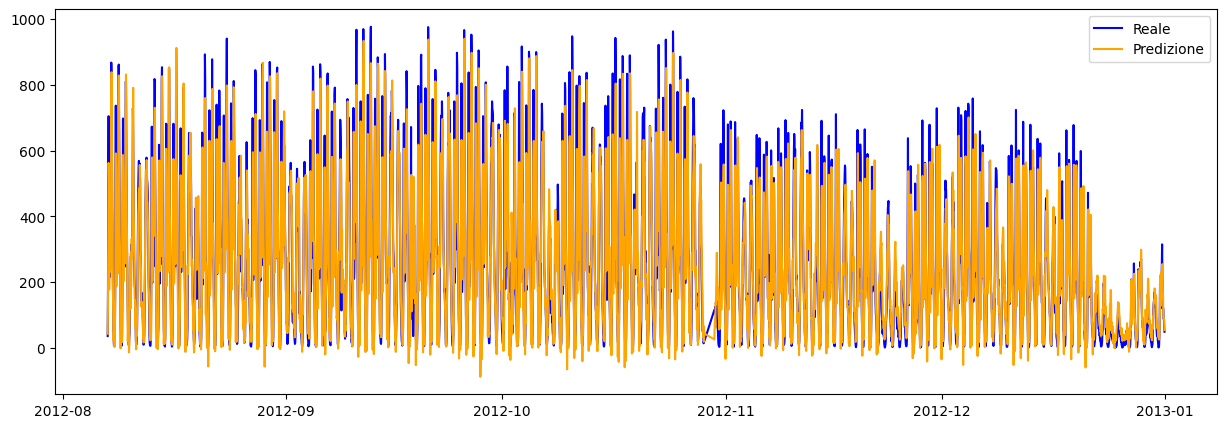

MSE: 6250.9171 | RMSE: 79.0627 | MAE: 54.8152 | R2: 0.8714 | MAPE: 44.24%


In [29]:
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
corr, _ = stats.pearsonr(y_pred, y_test)
R2 = r2_score(y_test, y_pred)
mape = smape(y_test, y_pred)

df_results = pd.DataFrame({
    'Reale': y_test, 
    'Predetto': y_pred
}, index=y_test.index) # Mantiene le date!

print(df_results)
# Plotta usando questo nuovo dataframe
plt.figure(figsize=(15, 5))
plt.plot(df_results['Reale'], label='Reale', color='blue')
plt.plot(df_results['Predetto'], label='Predizione', color='orange') # Giallo si vede poco
plt.legend()
plt.show()

print(f"MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f} | MAPE: {mape:.2f}%")

Text(0, 0.5, 'Residuals')

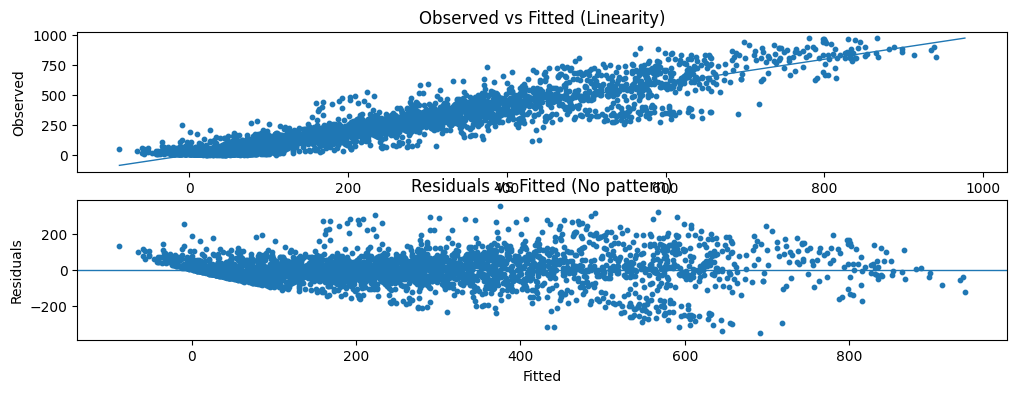

In [30]:
fig, ax = plt.subplots(2,1,figsize=(12,4))

ax[0].scatter(y_pred, y_test, s=10)
mn = np.min([y_pred.min(), y_test.values.min()])
mx = np.max([y_pred.max(), y_test.values.max()])
ax[0].plot([mn, mx], [mn, mx], lw=1)
ax[0].set_title("Observed vs Fitted (Linearity)")
ax[0].set_xlabel("Fitted")
ax[0].set_ylabel("Observed")



resid = y_test - y_pred

# (2) Residuals vs Fitted
ax[1].scatter(y_pred, resid, s=10)
ax[1].axhline(0, lw=1)
ax[1].set_title("Residuals vs Fitted (No pattern)")
ax[1].set_xlabel("Fitted")
ax[1].set_ylabel("Residuals")

# Provo Predizioni giornaliere a partire da quelle Orarie 

             Reale     Predetto
2012-08-07  7180.0  6819.345508
2012-08-08  7534.0  7231.527104
2012-08-09  7286.0  7246.806001
2012-08-10  5786.0  6091.167990
2012-08-11  6299.0  5919.911836
                     Reale    Predetto
2012-08-07 05:00:00   36.0   43.093203
2012-08-07 06:00:00  179.0  127.673711
2012-08-07 07:00:00  502.0  383.115513
2012-08-07 08:00:00  705.0  562.718582
2012-08-07 09:00:00  327.0  506.317650
...                    ...         ...
2012-12-31 19:00:00  119.0  106.666917
2012-12-31 20:00:00   89.0   93.568177
2012-12-31 21:00:00   90.0   92.012124
2012-12-31 22:00:00   61.0   83.333065
2012-12-31 23:00:00   49.0   54.566723

[3491 rows x 2 columns]


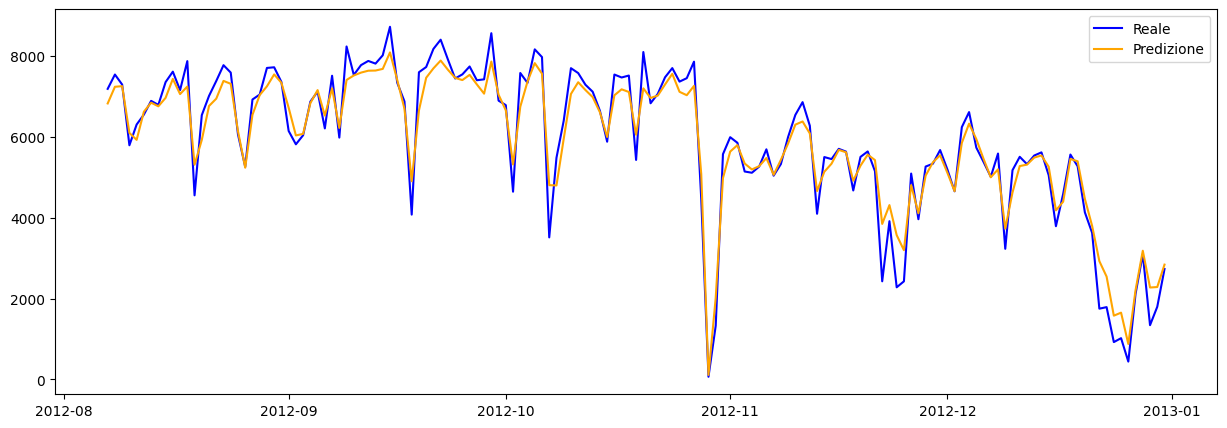

MSE: 183826.7523 | RMSE: 428.7502 | MAE: 320.2174 | R2: 0.9474 | MAPE: 7.95%


In [31]:
Df_predDaily = df_results.resample('D').sum()

print(Df_predDaily.head())

mse  = mean_squared_error(Df_predDaily["Reale"], Df_predDaily["Predetto"])
rmse = np.sqrt(mse)
mae  = mean_absolute_error(Df_predDaily["Reale"], Df_predDaily["Predetto"])
corr, _ = stats.pearsonr(Df_predDaily["Predetto"], Df_predDaily["Reale"])
R2 = r2_score(Df_predDaily["Reale"], Df_predDaily["Predetto"])
mape = smape(Df_predDaily["Reale"], Df_predDaily["Predetto"])



print(df_results)
# Plotta usando questo nuovo dataframe
plt.figure(figsize=(15, 5))
plt.plot(Df_predDaily["Reale"], label='Reale', color='blue')
plt.plot(Df_predDaily["Predetto"], label='Predizione', color='orange') # Giallo si vede poco
plt.legend()
plt.show()

print(f"MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f} | MAPE: {mape:.2f}%")

In [32]:
# Puo essere che Distrib anno 1 != Distribuzione anno 2 provo inferenza solo su anno 2 

In [33]:
Dataset_Anno2 = Dataset_Tot.loc["2012-01-01 00:00:00":]
print(Dataset_Anno2) 

                     season    yr  hr  holiday  workingday  temp   atemp  \
2012-01-01 00:00:00     1.0  2012   0      0.0           0  0.36  0.3788   
2012-01-01 01:00:00     1.0  2012   1      0.0           0  0.36  0.3485   
2012-01-01 02:00:00     1.0  2012   2      0.0           0  0.32  0.3485   
2012-01-01 03:00:00     1.0  2012   3      0.0           0  0.30  0.3333   
2012-01-01 04:00:00     1.0  2012   4      0.0           0  0.28  0.3030   
...                     ...   ...  ..      ...         ...   ...     ...   
2012-12-31 19:00:00     1.0  2012  19      0.0           1  0.26  0.2576   
2012-12-31 20:00:00     1.0  2012  20      0.0           1  0.26  0.2576   
2012-12-31 21:00:00     1.0  2012  21      0.0           1  0.26  0.2576   
2012-12-31 22:00:00     1.0  2012  22      0.0           1  0.26  0.2727   
2012-12-31 23:00:00     1.0  2012  23      0.0           1  0.26  0.2727   

                      hum  windspeed  casual  ...  cnt_lag_15  cnt_lag_16  \
2012-01-01

In [34]:
def Analisi_Model(DataFrame,Features, regr):   
    weights = pd.DataFrame({
        'Feature': Features,
        'Peso (Beta)': regr.coef_.flatten()
    })
    
    # Ordiniamo per importanza assoluta (sia positiva che negativa)
    weights['Importanza'] = weights['Peso (Beta)'].abs()
    weights_sorted = weights.sort_values(by='Importanza', ascending=False)
    
    print(weights_sorted)

Analisi_Model(x_train,x_train.columns,lm)
print("")

           Feature  Peso (Beta)  Importanza
5             temp    74.381936   74.381936
7              hum   -32.552135   32.552135
1               yr    25.869051   25.869051
8        windspeed   -23.517815   23.517815
31  weathersit_3.0   -21.378795   21.378795
9     Orario_punta    14.329573   14.329573
29  weathersit_1.0    13.553315   13.553315
16          mnth_7   -11.429808   11.429808
14          mnth_5     8.158116    8.158116
17          mnth_8    -6.872356    6.872356
30  weathersit_2.0     6.392499    6.392499
3          holiday    -5.718389    5.718389
19         mnth_10     5.404821    5.404821
10          mnth_1    -4.619875    4.619875
13          mnth_4     4.580878    4.580878
18          mnth_9     4.502236    4.502236
11          mnth_2    -4.279211    4.279211
0           season     4.148020    4.148020
4       workingday     3.949243    3.949243
27       weekday_5     3.506353    3.506353
6            atemp     3.091456    3.091456
22       weekday_0    -2.594162 

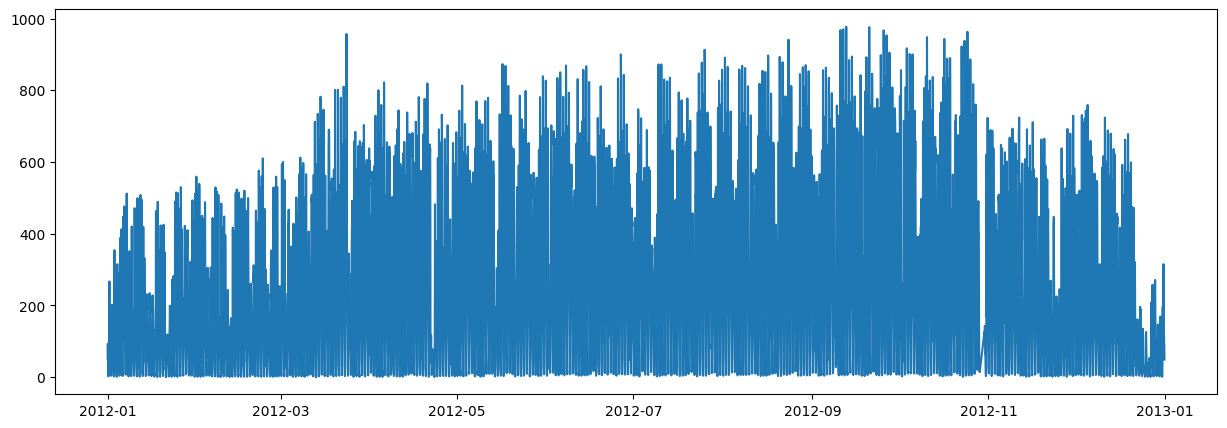

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(Dataset_Anno2["cnt"])

plt.show()

In [36]:
lista = ["cnt_lag_1","cnt_lag_2","cnt_lag_3","cnt_lag_4","cnt_lag_5", "cnt_lag_6","cnt_lag_7"]

x_data = Dataset_Anno2.drop(['cnt', 'casual' , "registered"], axis=1)
y_data = Dataset_Anno2['cnt']






In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle = False)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)


shape of x_train (7001, 57)
shape of y_train (7001,)
shape of x_test (1751, 57)
shape of y_test (1751,)


In [38]:
lm = LinearRegression() 

lm.fit(x_train,y_train)

y_pred= lm.predict(x_test)

print(y_pred[:5])

[765.25009262 828.13527435 518.72452805 351.72556506 328.6937115 ]


                     Reale    Predetto
2012-10-18 17:00:00  890.0  765.250093
2012-10-18 18:00:00  788.0  828.135274
2012-10-18 19:00:00  513.0  518.724528
2012-10-18 20:00:00  387.0  351.725565
2012-10-18 21:00:00  283.0  328.693711
...                    ...         ...
2012-12-31 19:00:00  119.0  117.288083
2012-12-31 20:00:00   89.0   96.037038
2012-12-31 21:00:00   90.0  100.568553
2012-12-31 22:00:00   61.0   93.431237
2012-12-31 23:00:00   49.0   63.293338

[1751 rows x 2 columns]


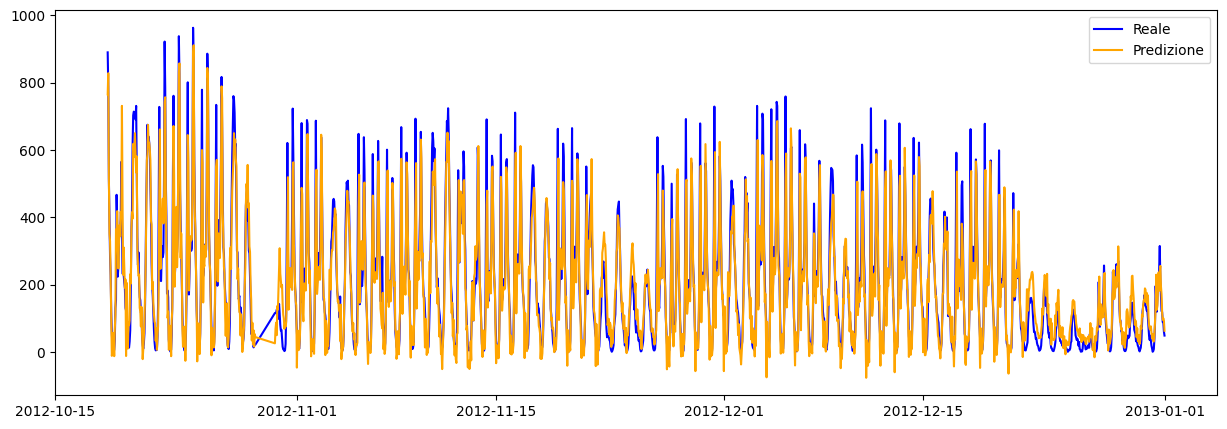

MSE: 5314.8072 | RMSE: 72.9027 | MAE: 50.6393 | R2: 0.8513


In [39]:
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
corr, _ = stats.pearsonr(y_pred, y_test)
R2 = r2_score(y_test, y_pred)


df_results = pd.DataFrame({
    'Reale': y_test, 
    'Predetto': y_pred
}, index=y_test.index) # Mantiene le date!

print(df_results)
# Plotta usando questo nuovo dataframe
plt.figure(figsize=(15, 5))
plt.plot(df_results['Reale'], label='Reale', color='blue')
plt.plot(df_results['Predetto'], label='Predizione', color='orange') # Giallo si vede poco
plt.legend()
plt.show()

print(f"MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f}")

Text(112.72222222222221, 0.5, 'Residuals')

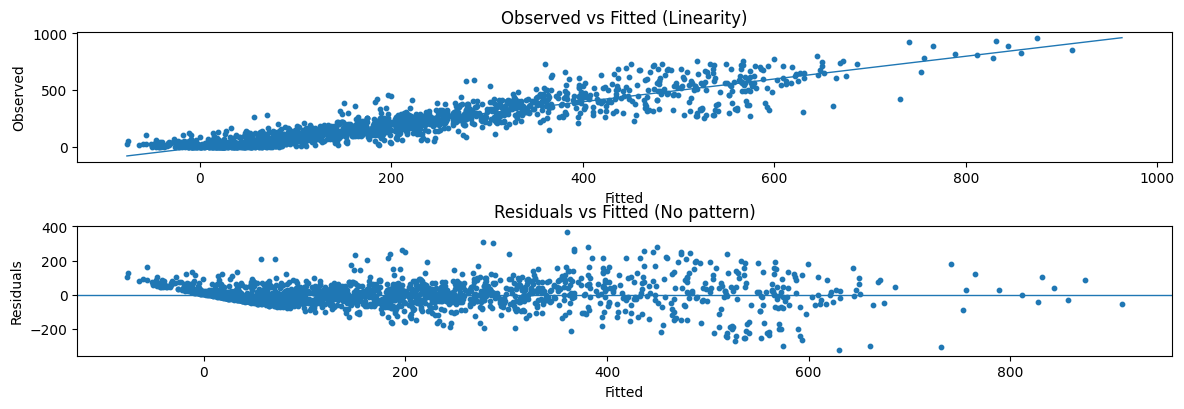

In [40]:
fig, ax = plt.subplots(2,1,figsize=(12,4))

ax[0].scatter(y_pred, y_test, s=10)
mn = np.min([y_pred.min(), y_test.values.min()])
mx = np.max([y_pred.max(), y_test.values.max()])
ax[0].plot([mn, mx], [mn, mx], lw=1)
ax[0].set_title("Observed vs Fitted (Linearity)")
ax[0].set_xlabel("Fitted")
ax[0].set_ylabel("Observed")

plt.tight_layout()

resid = y_test - y_pred

# (2) Residuals vs Fitted
ax[1].scatter(y_pred, resid, s=10)
ax[1].axhline(0, lw=1)
ax[1].set_title("Residuals vs Fitted (No pattern)")
ax[1].set_xlabel("Fitted")
ax[1].set_ylabel("Residuals")

             Reale     Predetto
2012-10-18  3207.0  3106.128538
2012-10-19  5424.0  6209.295028
2012-10-20  8090.0  7489.166284
2012-10-21  6824.0  6994.803975
2012-10-22  7058.0  7276.765927
                     Reale    Predetto
2012-10-18 17:00:00  890.0  765.250093
2012-10-18 18:00:00  788.0  828.135274
2012-10-18 19:00:00  513.0  518.724528
2012-10-18 20:00:00  387.0  351.725565
2012-10-18 21:00:00  283.0  328.693711
...                    ...         ...
2012-12-31 19:00:00  119.0  117.288083
2012-12-31 20:00:00   89.0   96.037038
2012-12-31 21:00:00   90.0  100.568553
2012-12-31 22:00:00   61.0   93.431237
2012-12-31 23:00:00   49.0   63.293338

[1751 rows x 2 columns]


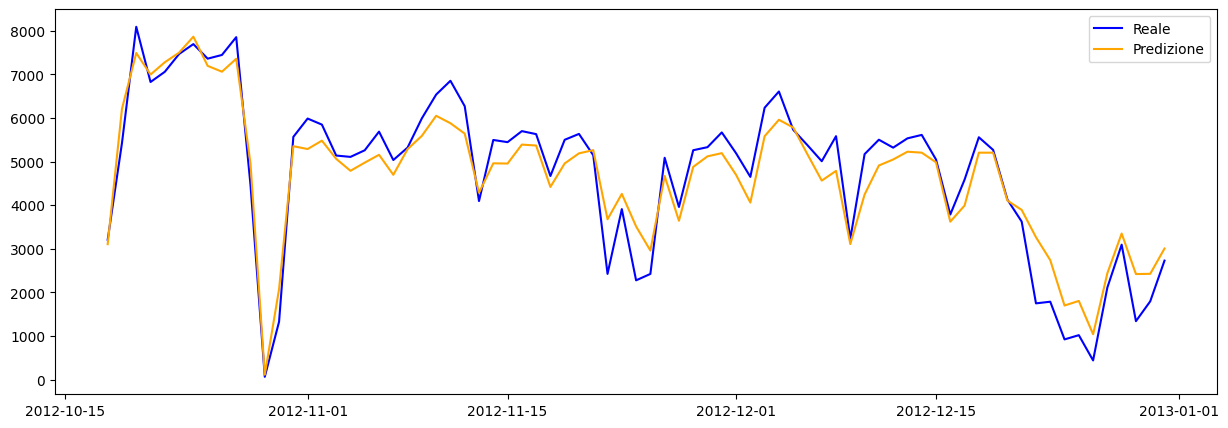

MSE: 291439.7570 | RMSE: 539.8516 | MAE: 444.2572 | R2: 0.9138


In [41]:
Df_predDaily = df_results.resample('D').sum()

print(Df_predDaily.head())

mse  = mean_squared_error(Df_predDaily["Reale"], Df_predDaily["Predetto"])
rmse = np.sqrt(mse)
mae  = mean_absolute_error(Df_predDaily["Reale"], Df_predDaily["Predetto"])
corr, _ = stats.pearsonr(Df_predDaily["Predetto"], Df_predDaily["Reale"])
R2 = r2_score(Df_predDaily["Reale"], Df_predDaily["Predetto"])




print(df_results)
# Plotta usando questo nuovo dataframe
plt.figure(figsize=(15, 5))
plt.plot(Df_predDaily["Reale"], label='Reale', color='blue')
plt.plot(Df_predDaily["Predetto"], label='Predizione', color='orange') # Giallo si vede poco
plt.legend()
plt.show()

print(f"MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f}")

# Prova Random Forest 

In [42]:



x_data = Dataset_Tot.drop(['cnt', 'casual' , "registered"], axis=1)
y_data = Dataset_Tot['cnt']

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle = False)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (13960, 57)
shape of y_train (13960,)
shape of x_test (3491, 57)
shape of y_test (3491,)


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)


y_pred = rf.predict(x_test)

print(y_pred[:5])

[ 37.31 179.16 518.16 671.55 340.72]


                     Reale  Predetto
2012-08-07 05:00:00   36.0     37.31
2012-08-07 06:00:00  179.0    179.16
2012-08-07 07:00:00  502.0    518.16
2012-08-07 08:00:00  705.0    671.55
2012-08-07 09:00:00  327.0    340.72
...                    ...       ...
2012-12-31 19:00:00  119.0     91.71
2012-12-31 20:00:00   89.0     86.87
2012-12-31 21:00:00   90.0     69.09
2012-12-31 22:00:00   61.0     69.49
2012-12-31 23:00:00   49.0     38.19

[3491 rows x 2 columns]


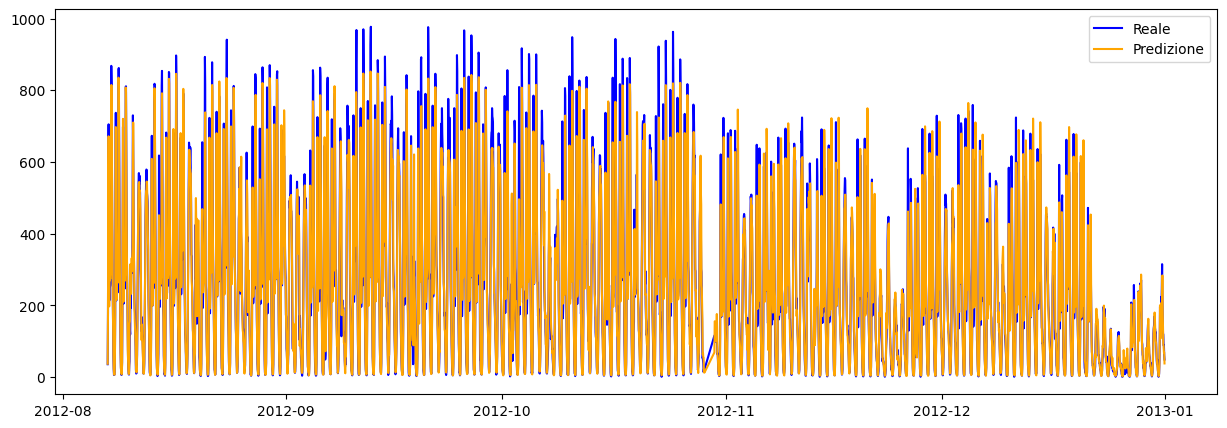

MSE: 2515.3749 | RMSE: 50.1535 | MAE: 30.7945 | R2: 0.9482


In [44]:
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
corr, _ = stats.pearsonr(y_pred, y_test)
R2 = r2_score(y_test, y_pred)


df_results = pd.DataFrame({
    'Reale': y_test, 
    'Predetto': y_pred
}, index=y_test.index) # Mantiene le date!

print(df_results)
# Plotta usando questo nuovo dataframe
plt.figure(figsize=(15, 5))
plt.plot(df_results['Reale'], label='Reale', color='blue')
plt.plot(df_results['Predetto'], label='Predizione', color='orange') # Giallo si vede poco
plt.legend()
plt.show()

print(f"MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f}")

Text(112.72222222222221, 0.5, 'Residuals')

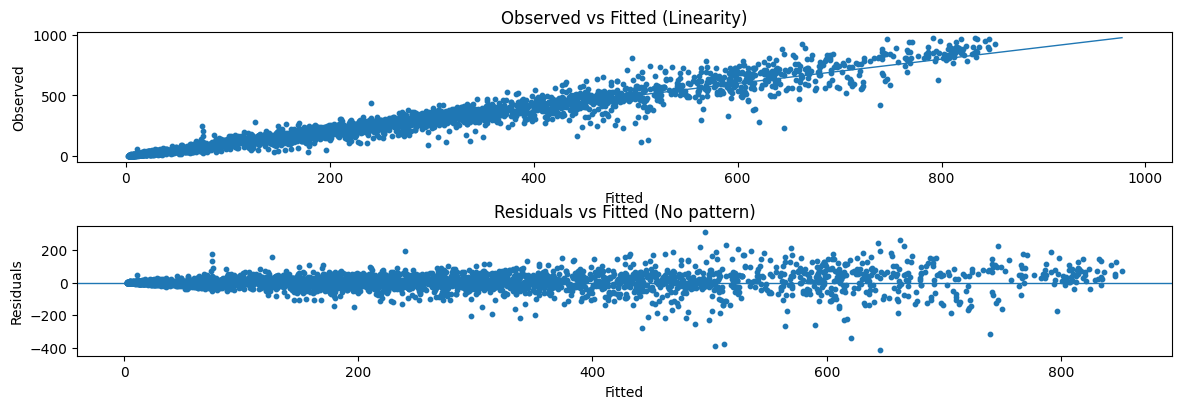

In [45]:
fig, ax = plt.subplots(2,1,figsize=(12,4))

ax[0].scatter(y_pred, y_test, s=10)
mn = np.min([y_pred.min(), y_test.values.min()])
mx = np.max([y_pred.max(), y_test.values.max()])
ax[0].plot([mn, mx], [mn, mx], lw=1)
ax[0].set_title("Observed vs Fitted (Linearity)")
ax[0].set_xlabel("Fitted")
ax[0].set_ylabel("Observed")

plt.tight_layout()

resid = y_test - y_pred

# (2) Residuals vs Fitted
ax[1].scatter(y_pred, resid, s=10)
ax[1].axhline(0, lw=1)
ax[1].set_title("Residuals vs Fitted (No pattern)")
ax[1].set_xlabel("Fitted")
ax[1].set_ylabel("Residuals")

             Reale  Predetto
2012-08-07  7180.0   7098.42
2012-08-08  7534.0   7399.24
2012-08-09  7286.0   7370.64
2012-08-10  5786.0   6093.67
2012-08-11  6299.0   6441.61
                     Reale  Predetto
2012-08-07 05:00:00   36.0     37.31
2012-08-07 06:00:00  179.0    179.16
2012-08-07 07:00:00  502.0    518.16
2012-08-07 08:00:00  705.0    671.55
2012-08-07 09:00:00  327.0    340.72
...                    ...       ...
2012-12-31 19:00:00  119.0     91.71
2012-12-31 20:00:00   89.0     86.87
2012-12-31 21:00:00   90.0     69.09
2012-12-31 22:00:00   61.0     69.49
2012-12-31 23:00:00   49.0     38.19

[3491 rows x 2 columns]


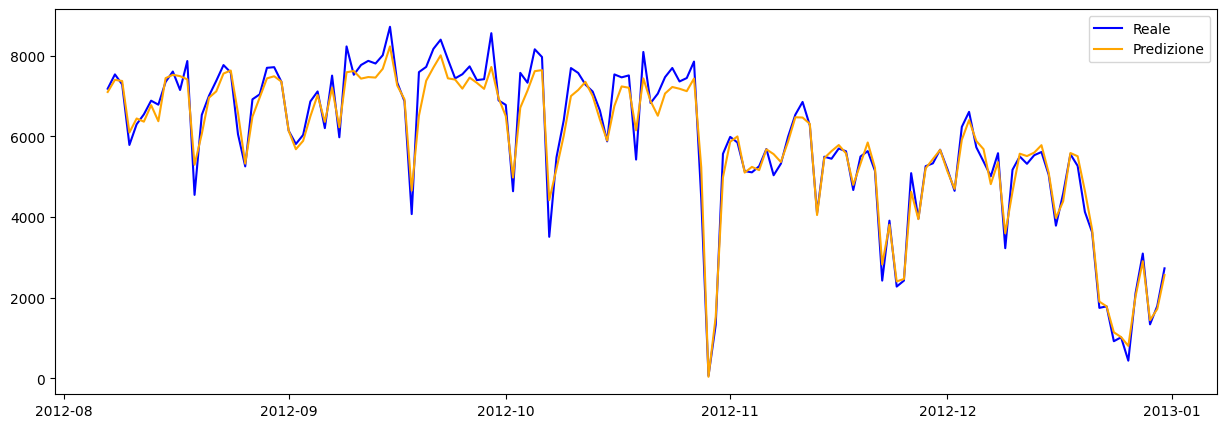

MSE: 111387.5649 | RMSE: 333.7478 | MAE: 252.4240 | R2: 0.9681


In [46]:
Df_predDaily = df_results.resample('D').sum()

print(Df_predDaily.head())

mse  = mean_squared_error(Df_predDaily["Reale"], Df_predDaily["Predetto"])
rmse = np.sqrt(mse)
mae  = mean_absolute_error(Df_predDaily["Reale"], Df_predDaily["Predetto"])
corr, _ = stats.pearsonr(Df_predDaily["Predetto"], Df_predDaily["Reale"])
R2 = r2_score(Df_predDaily["Reale"], Df_predDaily["Predetto"])




print(df_results)
# Plotta usando questo nuovo dataframe
plt.figure(figsize=(15, 5))
plt.plot(Df_predDaily["Reale"], label='Reale', color='blue')
plt.plot(Df_predDaily["Predetto"], label='Predizione', color='orange') # Giallo si vede poco
plt.legend()
plt.show()

print(f"MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {R2:.4f}")

In [47]:
#Random forest migliore su grande quantià di date Ora provo addestramento train val e test 

x_data = Dataset_Tot.drop(['cnt', 'casual' , "registered"], axis=1)
y_data = Dataset_Tot['cnt']

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle = False)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,shuffle = False)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_val",x_val.shape)
print("shape of y_val",y_val.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (11168, 57)
shape of y_train (11168,)
shape of x_val (2792, 57)
shape of y_val (2792,)
shape of x_test (3491, 57)
shape of y_test (3491,)


In [48]:
def _plot_three_sections(ax, y_tr, p_tr, y_val, p_val, p_te, n_tr, n_val, n_te,
                         title, date_labels=None):
    """Single axes: TRAIN (true+pred), VAL (true+pred), TEST (pred only)."""
    t_tr  = np.arange(n_tr)
    t_val = np.arange(n_tr, n_tr + n_val)
    t_te  = np.arange(n_tr + n_val, n_tr + n_val + n_te)

    # TRAIN
    ax.plot(t_tr, y_tr, label="True (train)", linewidth=1.2)
    ax.plot(t_tr, p_tr, label="Pred (train)", linewidth=1.0, alpha=0.9)

    # VAL
    if n_val > 0 and y_val is not None and p_val is not None:
        ax.plot(t_val, y_val, label="True (val)", linewidth=1.2)
        ax.plot(t_val, p_val, label="Pred (val)", linewidth=1.0, alpha=0.9)

    # TEST (predictions only)
    if n_te > 0 and p_te is not None:
        ax.plot(t_te, p_te, label="Pred (test)", linewidth=1.0, alpha=0.9)

    # shading & split lines
    split1 = n_tr
    split2 = n_tr + n_val
    ax.axvspan(0, split1, alpha=0.06)
    if n_val > 0:
        ax.axvspan(split1, split2, alpha=0.08)
    if n_te > 0:
        ax.axvspan(split2, split2 + n_te, alpha=0.10)
    ax.axvline(split1, linestyle="--", linewidth=1.2)
    if n_val > 0:
        ax.axvline(split2, linestyle="--", linewidth=1.2)

    ymin, ymax = ax.get_ylim()
    y_text = ymax - 0.02*(ymax - ymin)
    if date_labels is not None:
        if split1 is not None:
            ax.text(split1 + 2, y_text, f"{date_labels.get('train_end','train end')}", fontsize=8, va="top")
        if n_val > 0 and split2 is not None:
            ax.text(split2 + 2, y_text, f"{date_labels.get('val_end','val end')}", fontsize=8, va="top")
    else:
        ax.text(split1 + 2, y_text, "split 1", fontsize=8, va="top")
        if n_val > 0:
            ax.text(split2 + 2, y_text, "split 2", fontsize=8, va="top")

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.grid(True, alpha=0.3)
    ax.legend(loc="upper right", fontsize=8)

In [49]:
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

y_predTR = rf.predict(x_train)
y_predV = rf.predict(x_val)
y_predTE = rf.predict(x_test)

print(y_pred)

[ 37.31 179.16 518.16 ...  69.09  69.49  38.19]


In [50]:
df_resultsTR = pd.DataFrame({
    'Reale': y_train, 
    'Predetto': y_predTR
}, index=y_train.index)

df_resultsV = pd.DataFrame({
    'Reale': y_val, 
    'Predetto': y_predV
}, index=y_val.index)

df_resultsTE = pd.DataFrame({
    'Reale': y_test, 
    'Predetto': y_predTE
}, index=y_test.index) 

Df_predDailyTR = df_resultsTR.resample('D').sum()
Df_predDailyV = df_resultsV.resample('D').sum()
Df_predDailyTE = df_resultsTE.resample('D').sum()


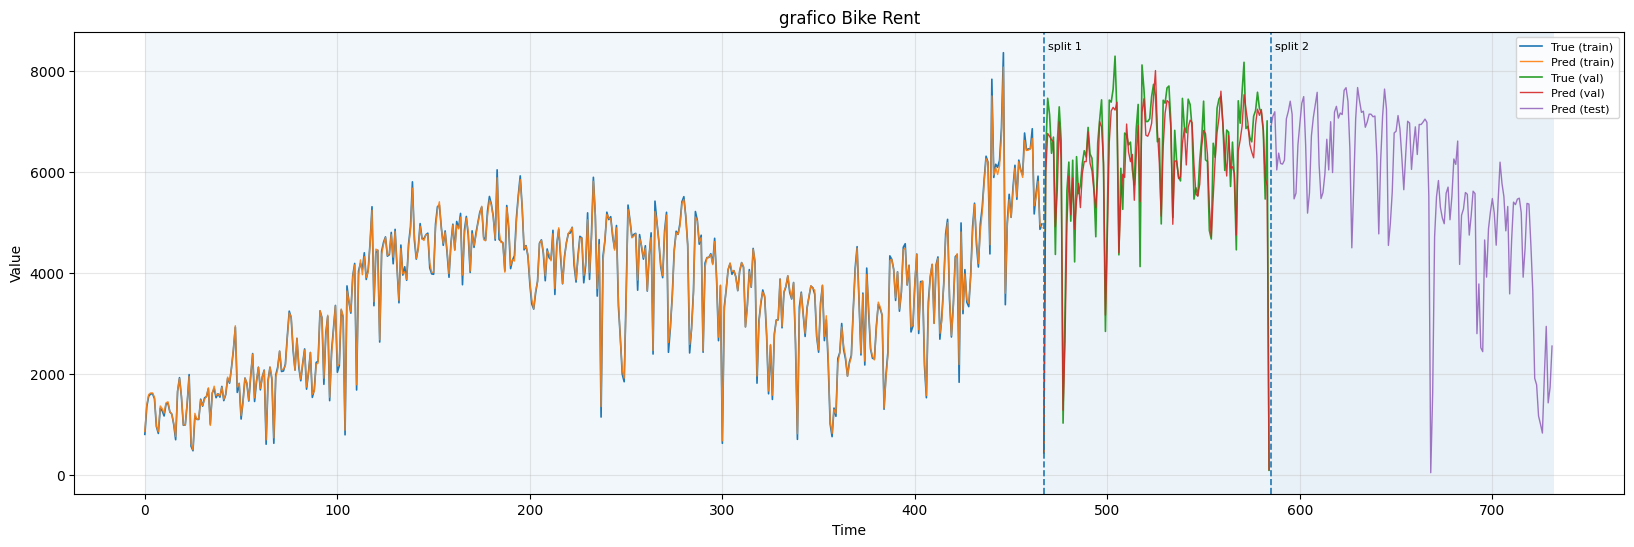

In [51]:

plt.figure(figsize= (20,6) )
ax = plt.subplot(111)

_plot_three_sections(ax, Df_predDailyTR["Reale"], Df_predDailyTR["Predetto"], Df_predDailyV["Reale"], Df_predDailyV["Predetto"], Df_predDailyTE["Predetto"], len(Df_predDailyTR["Reale"]), len(Df_predDailyV["Reale"]), len(Df_predDailyTE["Reale"]),
                         "grafico Bike Rent", date_labels=None)

In [52]:
mseTR  = mean_squared_error(Df_predDailyTR["Reale"], Df_predDailyTR["Predetto"])
rmseTR = np.sqrt(mseTR)
maeTR  = mean_absolute_error(Df_predDailyTR["Reale"], Df_predDailyTR["Predetto"])
R2TR = r2_score(Df_predDailyTR["Reale"], Df_predDailyTR["Predetto"])

mseV  = mean_squared_error(Df_predDailyV["Reale"], Df_predDailyV["Predetto"])
rmseV = np.sqrt(mseV)
maeV  = mean_absolute_error(Df_predDailyV["Reale"], Df_predDailyV["Predetto"])
R2V = r2_score(Df_predDailyV["Reale"], Df_predDailyV["Predetto"])

mseTE  = mean_squared_error(Df_predDailyTE["Reale"], Df_predDailyTE["Predetto"])
rmseTE = np.sqrt(mseTE)
maeTE  = mean_absolute_error(Df_predDailyTE["Reale"], Df_predDailyTE["Predetto"])
R2TE = r2_score(Df_predDailyTE["Reale"], Df_predDailyTE["Predetto"])



print(f"MSE_train: {mseTR:.4f} | RMSERT_train: {rmseTR:.4f} | MAE_train: {maeTR:.4f} | R2_train: {R2TR:.4f}")
print(f"MSE_val: {mseV:.4f} | RMSE_val: {rmseV:.4f} | MAE_val: {maeV:.4f} | R2_val: {R2V:.4f}")
print(f"MSE_test: {mseTE:.4f} | RMSE_test: {rmseTE:.4f} | MAE_test: {maeTE:.4f} | R2_test: {R2TE:.4f}")


MSE_train: 4659.2719 | RMSERT_train: 68.2589 | MAE_train: 49.4456 | R2_train: 0.9977
MSE_val: 230021.4898 | RMSE_val: 479.6056 | MAE_val: 378.6659 | R2_val: 0.8774
MSE_test: 288302.4645 | RMSE_test: 536.9380 | MAE_test: 408.5407 | R2_test: 0.9175


In [53]:
import os 
import joblib

csv_path = os.path.join("/kaggle/working/", 'Dataset_Bike.csv')
Dataset_Tot.to_csv(csv_path, index=True)
print(f"Dataset salvato in: {csv_path}")

# B) Salva il Modello (Random Forest)
model_path = os.path.join("/kaggle/working/", 'random_forest_model.joblib')
joblib.dump(rf, model_path)
print(f"Modello salvato in: {model_path}")

Dataset salvato in: /kaggle/working/Dataset_Bike.csv
Modello salvato in: /kaggle/working/random_forest_model.joblib
